# Lung Cancer Analysis

In [48]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

plt.style.use("seaborn")

### First 10 rows of Lung Cancer dataset

In [49]:
# Read data from csv
df = pd.read_csv("lung-cancer-survey.csv")
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,0,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


## Data Analysis

Shows summary analysis of each feature (column).

In [50]:
# Shows summary analysis of each feature(column)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,0.563107,0.496806,0.0,0.0,1.0,1.0,1.0
YELLOW_FINGERS,309.0,0.569579,0.495938,0.0,0.0,1.0,1.0,1.0
ANXIETY,309.0,0.498382,0.500808,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,309.0,0.501618,0.500808,0.0,0.0,1.0,1.0,1.0
CHRONIC DISEASE,309.0,0.504854,0.500787,0.0,0.0,1.0,1.0,1.0
FATIGUE,309.0,0.673139,0.469827,0.0,0.0,1.0,1.0,1.0
ALLERGY,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0
WHEEZING,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0


### Lung Cancer Data Dictionary
Below are describes the features and what their values mean. 
There are 15 independent variables to help predict the target(lung_cancer) variable.

`Independent variables`

1. Gender - (1 = male, 0 = female)
2. Age - age in years
3. Smoking - (1 = Yes, 0 = No)
4. Yellow_Fingers - (1 = Yes, 0 = No)
5. Anxiety - (1 = Yes, 0 = No)
6. Peer_Pressure - (1 = Yes, 0 = No)
7. Chronic_Disease - (1 = Yes, 0 = No)
8. Fatigue - (1 = Yes, 0 = No)
9. Allergy - (1 = Yes, 0 = No)
10. Wheezing - (1 = Yes, 0 = No)
11. Alcohol_Consuming - (1 = Yes, 0 = No)
12. Coughing - (1 = Yes, 0 = No)
13. Shortness_of_Breath - (1 = Yes, 0 = No)
14. Swallowing_Difficulty - (1 = Yes, 0 = No)
15. Chest_Pain - (1 = Yes, 0 = No)

`Target variable`

16. Lung_Cancer - target variable, have lung cancer or not, (1 = Yes, 0 = No)

There are no null values in the dataset.

In [51]:
# Check if there are any null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Data Visualizations

Below are three bar graphs that show the correlation between lung cancer and `gender`, `smoking`, and `chest pain`.

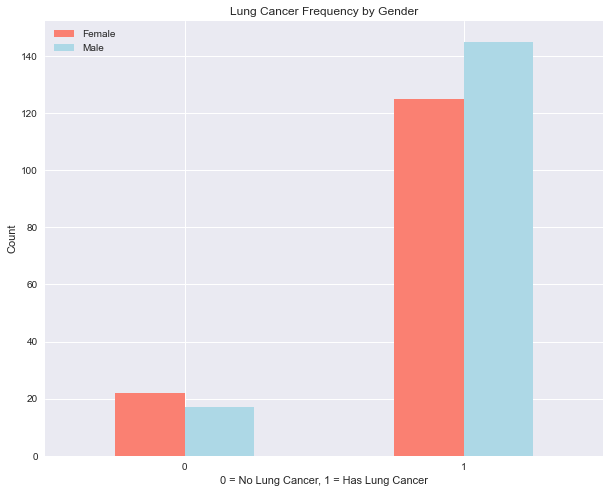

In [52]:
# Gender 
pd.crosstab(df.LUNG_CANCER, df.GENDER).plot(kind="bar", figsize=(10, 8), color=["salmon", "lightblue"]);
plt.title("Lung Cancer Frequency by Gender")
plt.xlabel("0 = No Lung Cancer, 1 = Has Lung Cancer")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

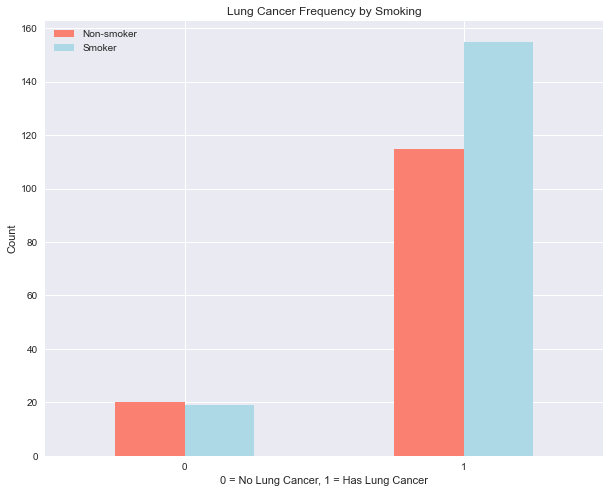

In [53]:
# Crosstab
pd.crosstab(df.LUNG_CANCER, df.SMOKING).plot(kind="bar", figsize=(10, 8), color=["salmon", "lightblue"]);
plt.title("Lung Cancer Frequency by Smoking")
plt.xlabel("0 = No Lung Cancer, 1 = Has Lung Cancer")
plt.ylabel("Count")
plt.legend(["Non-smoker", "Smoker"]);
plt.xticks(rotation=0);

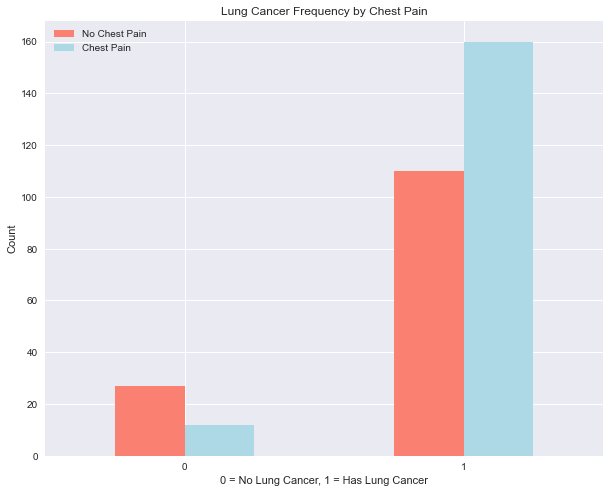

In [54]:
# Bar graph shows correlation between chest pain and lung cancer. Patients with chest pain have 
pd.crosstab(df.LUNG_CANCER, df["CHEST PAIN"]).plot(kind="bar", figsize=(10, 8), color=["salmon", "lightblue"]);
plt.title("Lung Cancer Frequency by Chest Pain")
plt.xlabel("0 = No Lung Cancer, 1 = Has Lung Cancer")
plt.ylabel("Count")
plt.legend(["No Chest Pain", "Chest Pain"]);
plt.xticks(rotation=0);

### Below are bar graphs that show the value counts for each feature in our dataset. 

`Independent variables`

1. Gender - (1 = male, 0 = female)
2. Age - age in years
3. Smoking - (1 = Yes, 0 = No)
4. Yellow_Fingers - (1 = Yes, 0 = No)
5. Anxiety - (1 = Yes, 0 = No)
6. Peer_Pressure - (1 = Yes, 0 = No)
7. Chronic_Disease - (1 = Yes, 0 = No)
8. Fatigue - (1 = Yes, 0 = No)
9. Allergy - (1 = Yes, 0 = No)
10. Wheezing - (1 = Yes, 0 = No)
11. Alcohol_Consuming - (1 = Yes, 0 = No)
12. Coughing - (1 = Yes, 0 = No)
13. Shortness_of_Breath - (1 = Yes, 0 = No)
14. Swallowing_Difficulty - (1 = Yes, 0 = No)
15. Chest_Pain - (1 = Yes, 0 = No)

`Target variable`

16. Lung_Cancer - target variable, have lung cancer or not, (1 = Yes, 0 = No)

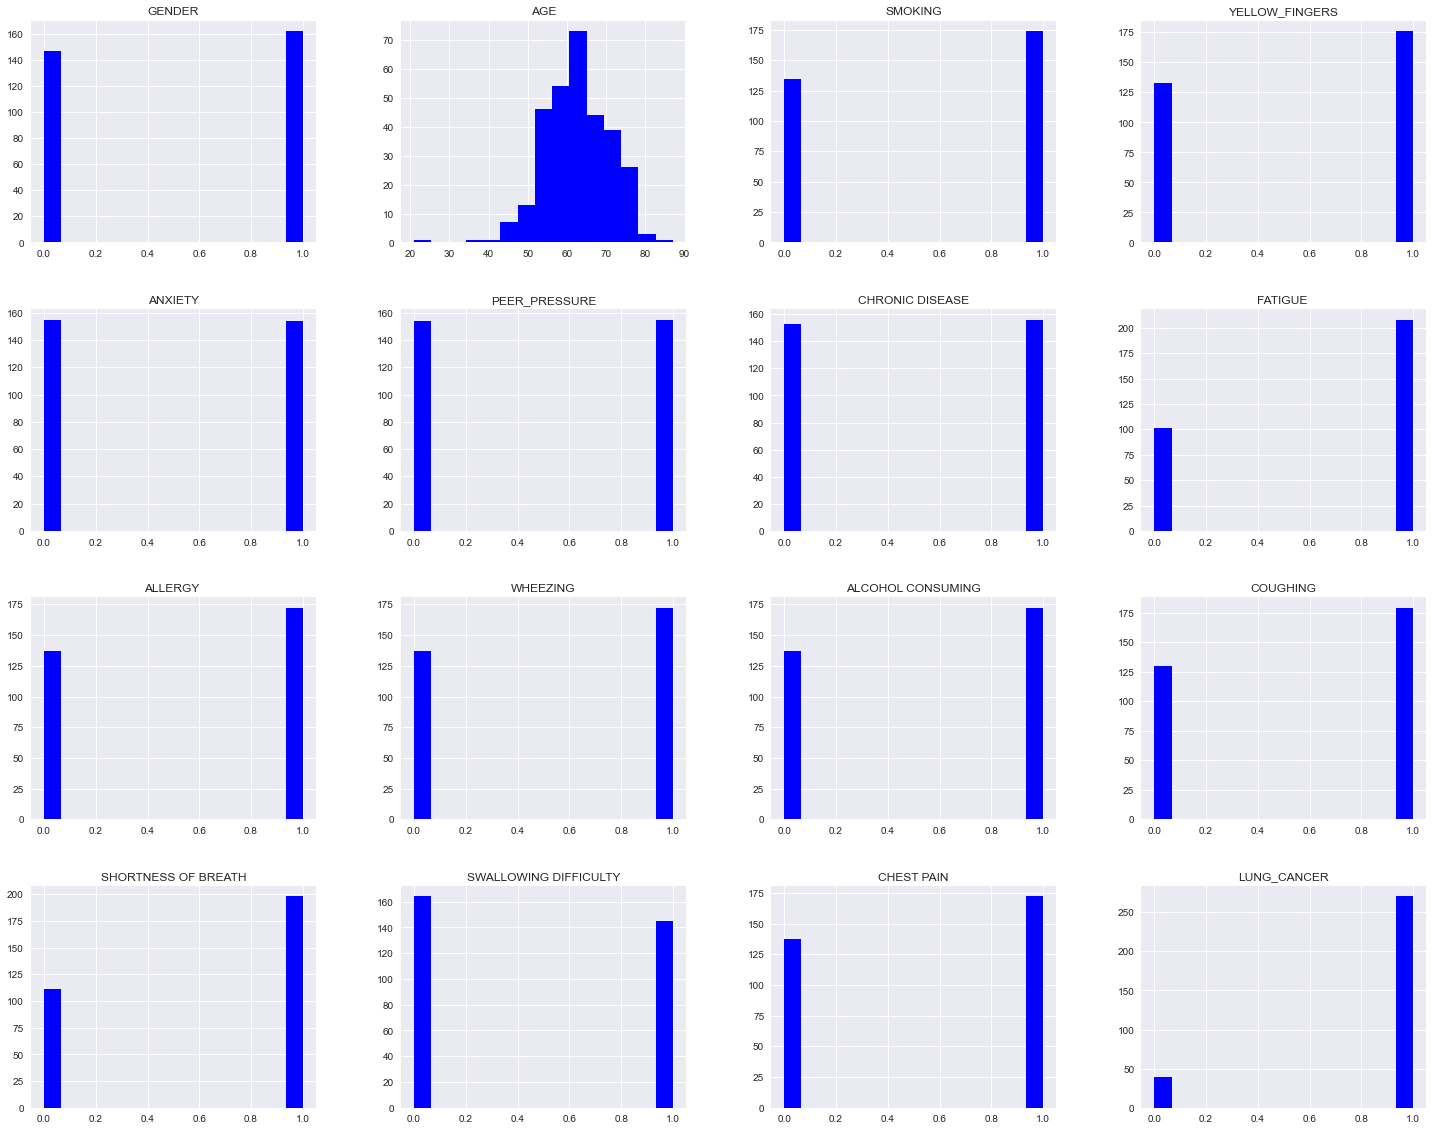

In [55]:
# Bar graph shows dataset count for each feature
df.hist(figsize=(25,20), color="blue", bins=15);

### Correlation heatmap

Correlation heatmap visualizes the strength of relationships between numerical variables.
Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A higher positive number means a positive correlation and a higher negative value means a negative correlation.

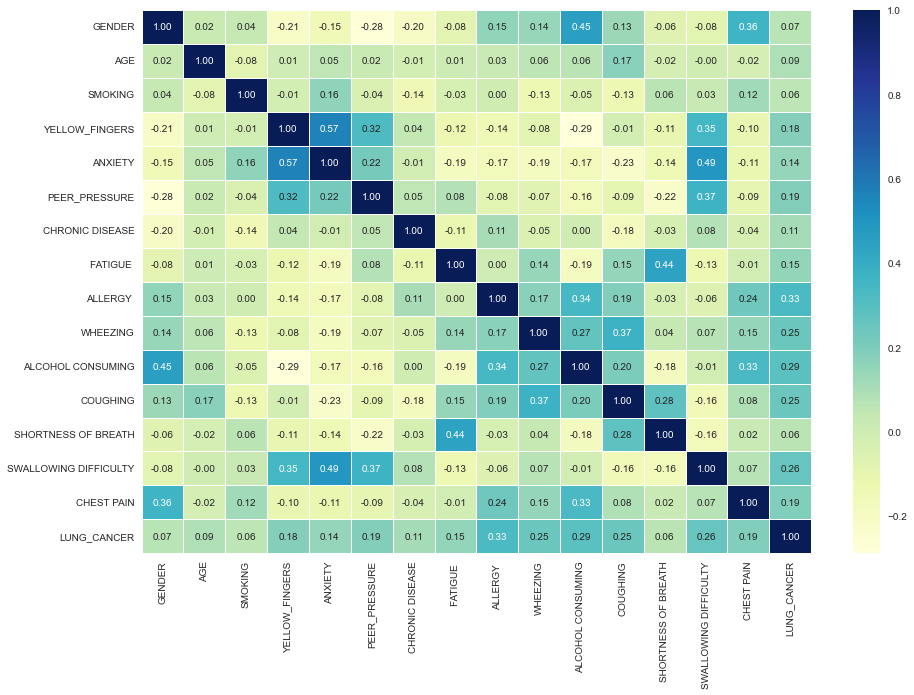

In [56]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

In [57]:
# Splitting data into train and test sets
np.random.seed(30)

# Independent variables
X = df.drop("LUNG_CANCER", axis=1)
# Dependent (target) variable
y = df["LUNG_CANCER"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [58]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(30)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [59]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
# model_scores

## Model Comparisons

This bar graph below shows the accuracy scores of the `K Nearest Neighbor`, `Logistic Regression`, and `Random Forest` machine learning models against our dataset.

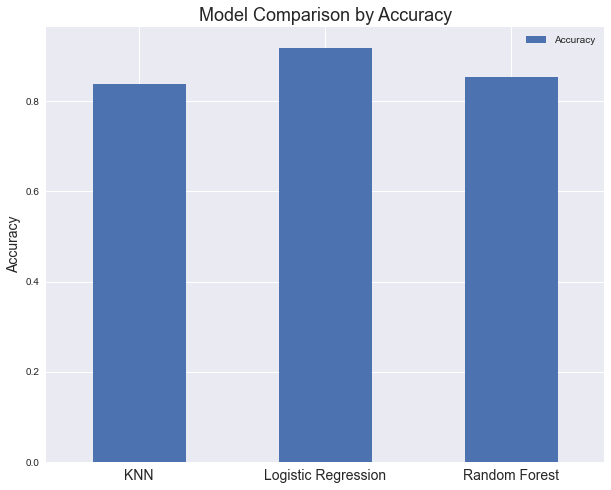

In [60]:
# Model Comparison
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10, 8));
plt.title("Model Comparison by Accuracy", fontsize=18);
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=0, fontsize=14);

In [61]:
print(f"Of the three models, Logistic Regression has the highest accuracy with {model_scores['Logistic Regression']:.8f}.")

Of the three models, Logistic Regression has the highest accuracy with 0.91935484.


In [62]:
np.random.seed(30)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# clf.score(X_test, y_test)
y_preds = clf.predict(X_test)
# y_preds, y_preds.shape

In [63]:
# Create UI to fill out survey

# Gender
gender_input = widgets.Dropdown(
    options=['Male', 'Female'],
    value='Male',
    description='Gender:',
    disabled=False,
    style={'description_width': 'initial'},
    layout={'width': 'max-content'},
)

# Age
age_input = widgets.IntSlider(
    value=18,
    min=1,
    max=120,
    step=1,
    description='Age:',
    disabled=False,
    style={'description_width': 'initial'},
)

# Dictionary of variable names and descriptions
feature_variable_desc = {
    "smoke_input": "Smoker: ",
    "yf_input": "Yellow Finger: ",
    "anxiety_input": "Anxiety: ",
    "pp_input": "Peer Pressure: ",
    "cd_input": "Chronic Disease: ",
    "fatigue_input": "Fatigue: ",
    "allergy_input": "Allergy: ",
    "wheezing_input": "Wheezing: ",
    "alcohol_input": "Consume alcohol: ",
    "cough_input": "Cough: ",
    "sob_input": "Shortness of Breath:",
    "swallow_input": "Difficulty swallowing",
    "cp_input": "Chest pain: ",
}

user_inputs = []
user_inputs.append(gender_input)
user_inputs.append(age_input)

# Iterates through feature dictionary and creates widgets for Yes/No value features
# Then appends to user_inputs list
for var, desc in feature_variable_desc.items():
    var = widgets.Dropdown(
        options=['Yes', 'No'],
        value='Yes',
        description=desc,
        disabled=False,
        style={'description_width': 'initial'},
        layout={'width': 'max-content'},
    )
    user_inputs.append(var)

# Predict button
predict_btn = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Predict lung cancer',
)

## Lung Cancer Survey

`Instructions`
1. Please fill out the `15` question survey. 
2. Press the `Predict` button to see the result.

In [64]:
# Display inputs
for input in user_inputs:
    display(input)

Dropdown(description='Gender:', layout=Layout(width='max-content'), options=('Male', 'Female'), style=Descript…

IntSlider(value=18, description='Age:', max=120, min=1, style=SliderStyle(description_width='initial'))

Dropdown(description='Smoker: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=DescriptionS…

Dropdown(description='Yellow Finger: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Descr…

Dropdown(description='Anxiety: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Description…

Dropdown(description='Peer Pressure: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Descr…

Dropdown(description='Chronic Disease: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Des…

Dropdown(description='Fatigue: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Description…

Dropdown(description='Allergy: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Description…

Dropdown(description='Wheezing: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Descriptio…

Dropdown(description='Consume alcohol: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Des…

Dropdown(description='Cough: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=DescriptionSt…

Dropdown(description='Shortness of Breath:', layout=Layout(width='max-content'), options=('Yes', 'No'), style=…

Dropdown(description='Difficulty swallowing', layout=Layout(width='max-content'), options=('Yes', 'No'), style…

Dropdown(description='Chest pain: ', layout=Layout(width='max-content'), options=('Yes', 'No'), style=Descript…

In [65]:
def convert_val_to_int(value):
    """
    Helper function, converts user input value to 0 or 1
    value: User input from field
    """
    if type(value) == str:
        if value == "Yes" or value == "Male":
            return 1
        if value == "No" or value == "Female":
            return 0
    if type(value) == int:
        return value
    return None


def get_user_pred_values():
    """
    Get user input data from survey
    Convert answers to int values and append to user_pred_values list
    """
    user_pred_values = []
    for input in user_inputs:
        user_pred_values.append(convert_val_to_int(input.value))
    return user_pred_values


def predict_user_inputs(model, user_inputs):
    """
    Predicts user input against model and outputs result as a string
    model: machine learning model
    user_inputs: list of survey inputs from user
    """
    values = np.array(user_inputs)
    result = clf.predict([values])
    if result[0] == 1:
        return "HAS lung cancer"
    if result[0] == 0:
        return "DOES NOT have lung cancer"
    return None


# Displays prediction button and output field
output = widgets.Output()
display(predict_btn, output)

# Prints prediction result when predict button is clicked.
def on_button_clicked(b):
    with output:
        output.clear_output()
        print(f"Based on the survey, the model predicts that the patient {predict_user_inputs(clf, get_user_pred_values())}.")

# Connect on click function to predict button
try:
    predict_btn.on_click(on_button_clicked)
except TypeError:
    pass

Button(description='Predict', style=ButtonStyle(), tooltip='Predict lung cancer')

Output()